In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [8]:
import numpy as np
import pandas as pd
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [9]:
# 수학 칼럼에 대한 정보 뽑기
print(f"수학 평균값: {df.mathematics.mean()}")
print(f"수학 중앙값: {df.mathematics.median()}")
print(f"수학 최빈값: {df.mathematics.mode()[0]}, {df.mathematics.mode()[1]}, {df.mathematics.mode()[2]}")
print(f"수학 분산(불편분산): {df.mathematics.var(ddof=1)}")
print(f"수학 표준편차: {df.mathematics.std()}")
print(f"수학 범위: {df.mathematics.min()} ~ {df.mathematics.max()}")
print(f"수학 IQR: {np.percentile(df.mathematics, 75) - np.percentile(df.mathematics, 25)}")
      # percentile 대신 df.mathematics.describe()['25%'] 로 사용해도 됨

수학 평균값: 78.88
수학 중앙값: 80.0
수학 최빈값: 77, 82, 84
수학 분산(불편분산): 70.80163265306118
수학 표준편차: 8.414370603500965
수학 범위: 57 ~ 94
수학 IQR: 8.0


Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [19]:
score = df.english
type(score)

pandas.core.series.Series

In [281]:
#표준화 (평균0, 표준편차1 로 맞추기)
score = (score-score.mean()) / score.std()
sc = np.array(score)
print(sc[:5])

[-1.95306594  1.10021929 -0.369881   -2.06615058 -0.25679637]


Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

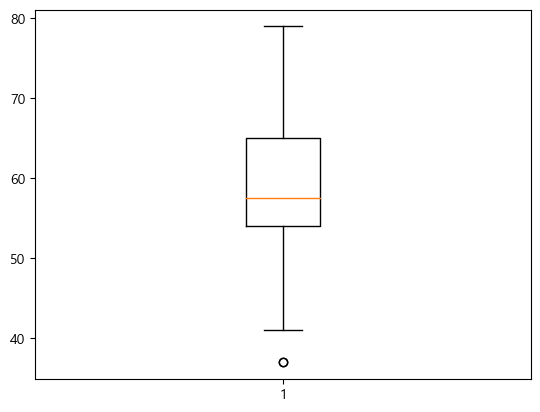

이상치: [37 37]
이상치 인덱스: [19 34]


In [294]:
df = pd.read_csv('../data/ch2_scores_em.csv',index_col='student number')
score = np.array(df.english)

#박스플랏
plt.boxplot(score)
plt.show()

#이상치 제거
d75 = np.percentile(score, 75)
d25 = np.percentile(score, 25)
iqr = d75 - d25
up_whisker = d75+(iqr*1.5)
dw_whisker = d25-(iqr*1.5)

idx = np.where((score > up_whisker) | (score < dw_whisker))
print(f"이상치: {score[idx]}")
print(f"이상치 인덱스: {idx[0]}")

score = np.delete(score, idx[0])

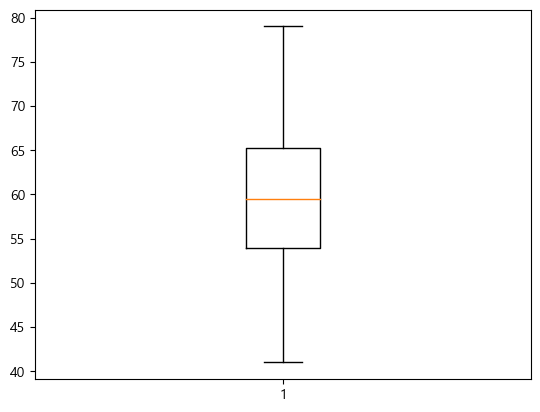

In [295]:
#다시 박스플랏을 그려서 이상치 제거 확인
plt.boxplot(score)
plt.show()

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(산점도, 회귀직선 포함, 박스플롯, 바이올린플롯을 2행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)
- 두개 변수에 대한 다차원 그래프(조인트 플롯)를 시각화

In [37]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

df_s = pd.DataFrame({'english':en_scores,'mathematics':ma_scores},index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],name='student'))
df_s

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [38]:
#공분산: 두 편차를 곱한 값
std_e = df_s.english - df_s.english.mean()
std_m = df_s.mathematics - df_s.mathematics.mean()
df_s['pro_deviation'] = (std_e * std_m).round(2)

# 각 칼럼별 분산, 공분산 평균 (2가지 방법)
pd_mean = df_s.pro_deviation.mean()
pd_mean = np.cov(df_s.english, df_s.mathematics, ddof=0)
print(f"편차 공분산: {pd_mean[0,1].round(2)}")

# 상관계수
cor = np.corrcoef(df_s.english, df_s.mathematics, ddof=0)
print(f"상관계수: {cor[0,1].round(2)}")

df_s.head()

편차 공분산: 62.8
상관계수: 0.82


,english,mathematics,pro_deviation
student,,,
A,42,65,83.2
B,69,80,120.4
C,56,63,-8.4
D,41,63,117.6
E,57,76,9.2


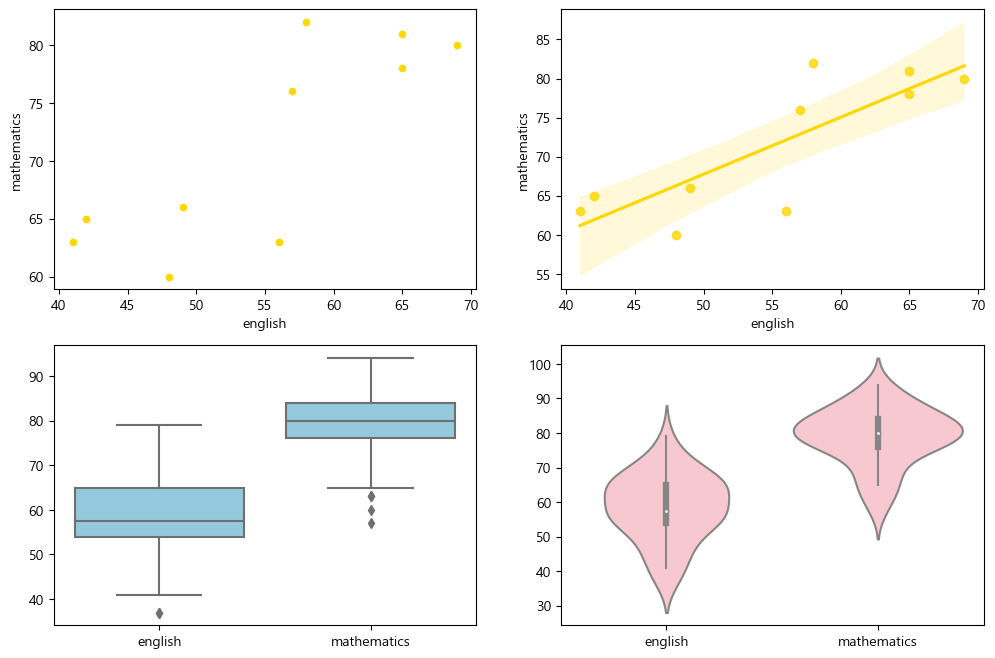

In [297]:
# 산점도/ 회귀선 포함 산점/ 박스플랏/ 바이올린 플랏
fig, ax = plt.subplots(2,2, figsize=(12,8))

sns.scatterplot(x='english', y='mathematics', data=df_s, color='gold', ax=ax[0,0])
sns.regplot(x='english', y='mathematics', data=df_s, color='gold',ax=ax[0,1])
sns.boxplot(data=df, color='skyblue', ax=ax[1,0])
sns.violinplot(data=df, color='pink', ax=ax[1,1])

plt.show()

<AxesSubplot:>

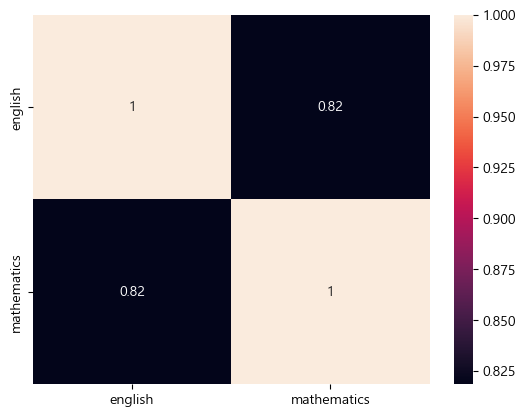

In [40]:
# 히트맵
# 히트맵은 그래프 자체가 너무 복잡해서, 위에처럼 여러 그래프를 동시에 함께 그리려고 하면 안 들어감
dfh = df_s.drop('pro_deviation', axis=1)
sns.heatmap(dfh.corr(), annot=True)

<Figure size 1000x600 with 0 Axes>

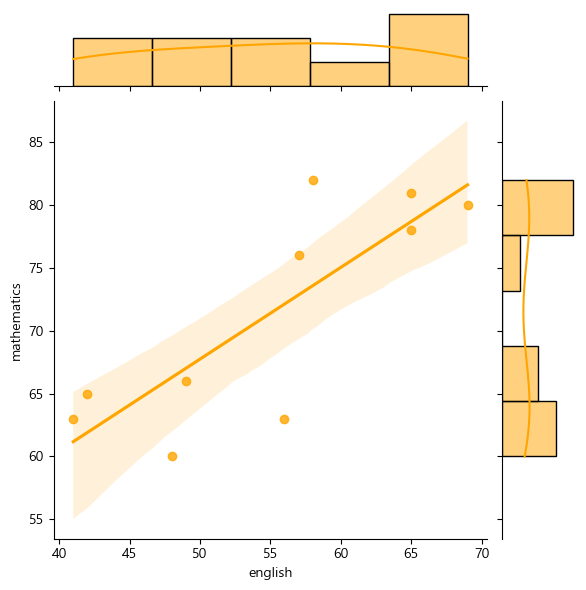

In [41]:
# 조인트 플랏
plt.figure(figsize=(10,6))
sns.jointplot(x='english', y='mathematics', data=df_s, kind='reg', color='orange')

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

<AxesSubplot:ylabel='Frequency'>

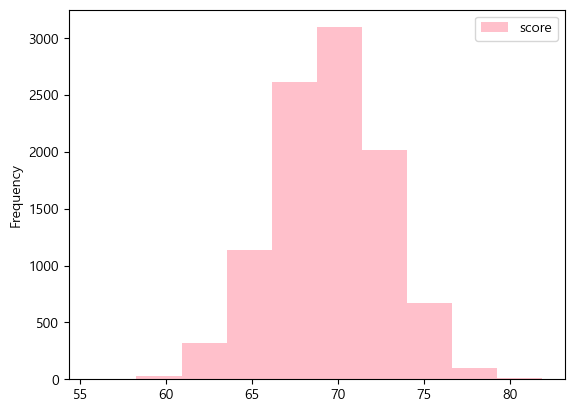

In [45]:
# 랜덤하게 뽑은 샘플들의 평균 분포
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])

meanarr=np.zeros(10000)
for i in range(10000):
    sample = np.random.choice(scores, 20)
    meanarr[i] = sample.mean()
    
meanarr = pd.DataFrame(meanarr, columns=['score'])
meanarr.plot(kind='hist', color='pink')

Q9. 평균이 10, 표준편차가 3인 정규분포에서 다음 사항을 수행하세요.
- 확률밀도함수를 그래프로 표현하고 x값이 10일때의 확률을 구하세요.
- 확률이 0.1인 x값을 구하세요.

x=10일 때 확률: 0.1329807601338109
(누적)확률이 0.1일때 x값: 6.1553453033661985


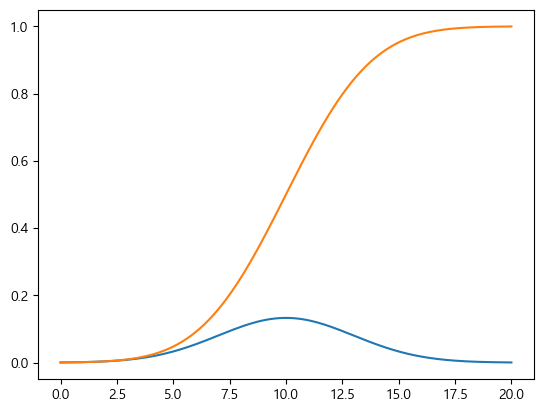

In [305]:
# 정규분포
x = np.arange(0, 20.1, 0.1)
plt.plot(x, stats.norm.pdf(x=x, loc=10, scale=3))  #확률 밀도함수 그래프
plt.plot(x, stats.norm.cdf(x=x, loc=10, scale=3))  #누적 확률분포 그래프

print(f"x=10일 때 확률: {stats.norm(loc=10, scale=3).pdf(x=10)}")   #확률밀도함수로 봐야함
print(f"(누적)확률이 0.1일때 x값: {stats.norm(loc=10, scale=3).ppf(0.1)}")  #누적함수로 봐야함

Q10. 평균이 1, 표준편차가 2인 정규분포에서 다음을 수행하세요.
- 누적분포함수를 그래프로 표현하고 x분위가 8일때의 누적확률을 구하세요. 
- 누적 확률이 0.5일때의 x분위를 구하세요.

x=8일 때 누적확률: 0.9997673709209645
누적확률=0.5일 때 x값: 1.0


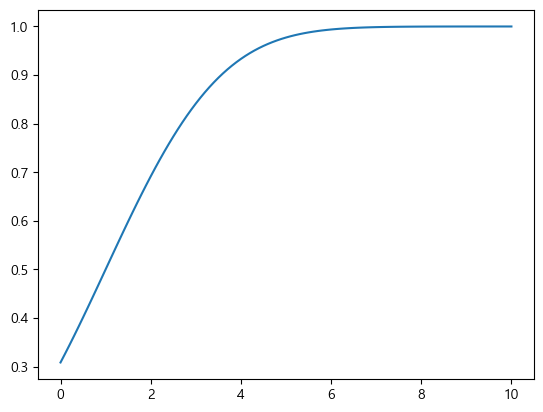

In [47]:
# 누적 정규분포
x = np.arange(0, 10.1, 0.1)
plt.plot(x, stats.norm.cdf(x, loc=1, scale=2))

print(f"x=8일 때 누적확률: {stats.norm(loc=1, scale=2).cdf(x=8)}")
print(f"누적확률=0.5일 때 x값: {stats.norm(loc=1, scale=2).ppf(0.5)}")

Q11. "dataset/5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [308]:
df1 = pd.read_csv('../dataset/5_2_fm.csv')

# 값 변경
df2 = df1.copy()
df2.replace({'A':'C', 'B':'D'}, inplace=True)

# 특정 조건 만족하는 값 변경
idx1 = df2['species']=='C'
idx2 = df2['species']=='D'
df2.length[idx1] *=2
df2.length[idx2] *=3

# 행 방향 결합
df = pd.concat([df1, df2], ignore_index=True)   #ignore_index: 인덱스 0부터 재배열

# species을 기준으로 나눈 후, 평균과 표준편차 출력
df.groupby(['species']).agg(['mean','std'])

length     
          mean  std
species            
A          3.0  1.0
B          8.0  2.0
C          6.0  2.0
D         24.0  6.0

Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [74]:
shoes = pd.read_csv("../dataset/5_2_shoes.csv")

# 카피 후 아래에 붙여넣기
shoes1 = shoes.copy()
shoes = pd.concat([shoes, shoes1], axis=0, ignore_index=True)

# 피벗 테이블
pv = pd.pivot_table(data=shoes, values='sales', aggfunc='sum', index='store', columns='color')

# 카이제곱 검정: p-value가 0.05보다 크므로 귀무가설 기각x
chi, p, dof, expected = chi2_contingency(pv)
print(f'카이제곱 검정 통계량: {chi}')
print(f'p값: {p}')
print(f'자유도: {dof}')
print(f'기대빈도: {expected}')
pv

카이제곱 검정 통계량: 2.6923019598155475
p값: 0.10083404585392487
자유도: 1
기대빈도: [[21.53191489 22.46808511]
 [24.46808511 25.53191489]]


color,blue,red
store,,
osaka,26,18
tokyo,20,30


Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


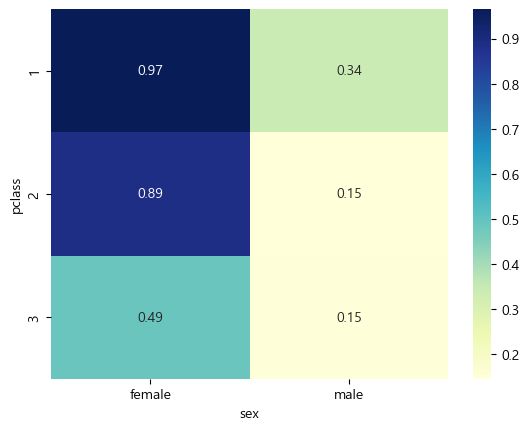

In [61]:
titanic = pd.read_csv('../dataset/titanic3.csv')
pt = pd.pivot_table(data=titanic, index='pclass', columns='sex', values='survived', aggfunc='mean')

sns.heatmap(pt, annot=True, cmap='YlGnBu')
pt
# 등급에 관계 없이 여성의 생존률이 남성의 생존률보다 높음(3등급 객실의 여성이 1등급 객실의 남성보다 생존률 높음)
# 객실 등급이 높을 수록 생존률 높음
# 다만 남성의 경우 전체 생존률이 워낙 낮아서 1등급 객실 생존률도 그닥 높은 편은 아님

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [69]:
a = np.zeros(10000)
for i in range(10000):
    sample = np.random.normal(4,0.8, 10)
    a[i] = sample.mean()
    
a[:10]

array([4.04106668, 4.01719293, 4.05527836, 4.52264576, 4.11211759,
       4.16307619, 3.97244924, 4.09815378, 4.22398079, 4.04390535])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

<AxesSubplot:ylabel='Count'>

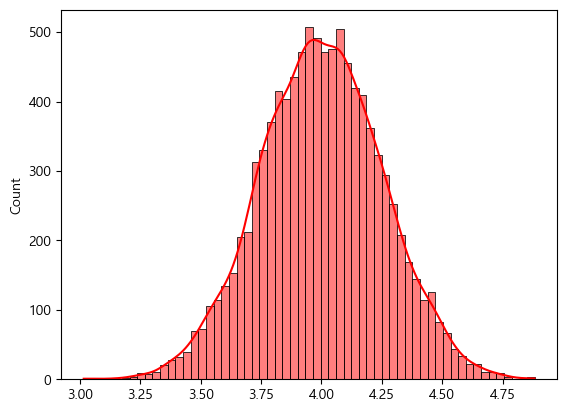

In [81]:
sns.histplot(a, kde=True, color='red')

Q16. 크기가 10인 표본 데이터 [1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4]로 다음을 수행하세요.
- 평균과 표준편차를 구하세요
- 신뢰수준을 95%로 설정하고 자유도를 계산하세요.
- 신뢰구간을 계산하고 결과를 출력하세요.

In [100]:
sample = [1.2, 1.8, 1.6, 1.4, 1.5, 1.7, 1.9, 1.3, 1.1, 1.4]

mean = np.mean(sample)
std = np.std(sample)
dof = len(sample)-1
se = std/np.sqrt(len(sample))
interval = stats.t.interval(alpha=0.05, df=dof, scale=se, loc=mean)

print(f"평균: {mean}")
print(f"표준편차: {std.round(2)}")
print(f"자유도: {dof}")
print(f"신뢰구간: {interval[0].round(4)} ~ {interval[1].round(4)}")

평균: 1.49
표준편차: 0.25
자유도: 9
신뢰구간: 1.485 ~ 1.495


Q17. 어떤 제품을 생산하는 공장에서 제품의 길이를 측정하여 표본평균과 표본표준편차를 계산했다고 가정한다. 이때 제품의 평균 길이를 추정하기 위하여 표본을 아래와 같이 추출하였다. 각각의 경우에 적합한 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]
- 95% 신뢰수준에서의 신뢰구간
- 99% 신뢰수준에서의 신뢰구간

In [96]:
sample = [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

mean = np.mean(sample)
std = np.std(sample)
dof = len(sample)-1
se = std/np.sqrt(len(sample))    #표준오차

interval1 = stats.t.interval(alpha=0.95, df=dof, loc=mean, scale=se) 
print(f"95% 신뢰구간: {interval1[0].round(4)} ~ {interval1[1].round(4)}")

interval2 = stats.t.interval(alpha=0.99, df=dof, loc=mean, scale=se) 
print(f"99% 신뢰구간: {interval2[0].round(4)} ~ {interval2[1].round(4)}")
# 신뢰수준이 높아지면 신뢰구간이 늘어남

95% 신뢰구간: 49.8057 ~ 50.4743
99% 신뢰구간: 49.6597 ~ 50.6203


Q18. 모집단의 표준편차는 0.5로 알려져 있다. 주어진 표본 데이터로 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

In [109]:
sample = [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

m_std = 0.5

mean = np.mean(sample)
std = np.std(sample)
slen = len(sample)
dof = slen-1
alpha = 0.05

z = norm.ppf(1-0.025, dof)
interval1 = mean - (z * m_std / np.sqrt(slen))
interval2 = mean + (z * m_std / np.sqrt(slen))
print(f"95% 신뢰구간: {interval1.round(4)} ~ {interval2.round(4)}")

95% 신뢰구간: 48.4071 ~ 51.8729


Q19. 모집단의 표준편차는 알려져 있지 않다. 주어진 표본 데이터로 신뢰구간을 계산하세요.

표본 : [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

In [110]:
sample = [49.6, 51.3, 49.9, 50.2, 49.8, 50.5, 49.7, 50.1, 50.3, 50.0]

# 평균, 표준편차
mean = np.mean(sample)
std = np.std(sample)

# 표준오차, 자유도, 신뢰수준
se = std/np.sqrt(len(sample))
dof = slen-1
alpha = 0.95

interval = stats.t.interval(alpha=alpha, loc=mean, scale=se, df=dof)
print(f"95% 신뢰구간: {interval[0].round(4)} ~ {interval[1].round(4)}")

95% 신뢰구간: 49.8057 ~ 50.4743


Q20. 자유도가 10이고 유의 수준이 0.05인 경우의 t-value를 구하세요.

In [116]:
dof = 10
alpha = 0.05
t_value = stats.t.ppf(1-alpha/2, dof)
t_value

2.2281388519649385

Q21. 10000개의 표본으로 t 분포를 구성하여 자유도가 커짐에 따라 표준정규에 근사하는 현상을 그래프로 시각화하세요. 

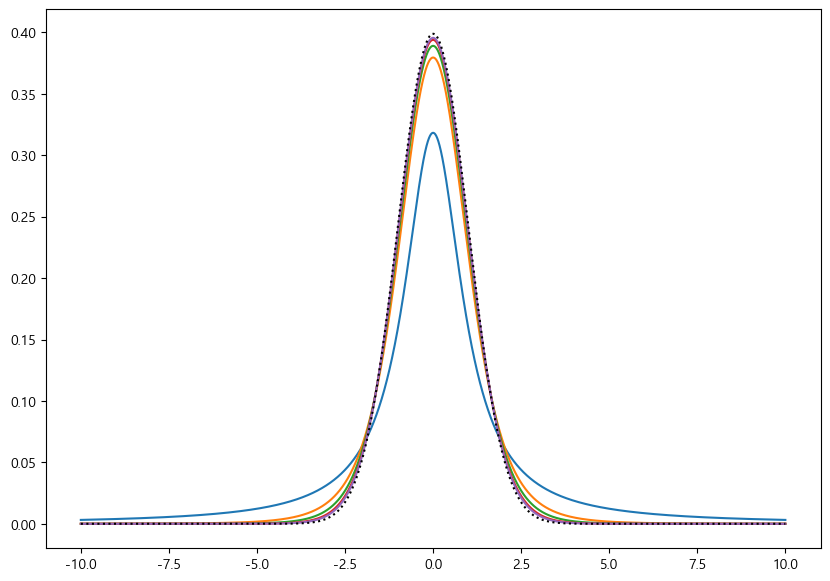

In [201]:
fig, ax = plt.subplots(figsize=(10,7))
x = np.linspace(-10,10,10000)

df_list = [1,5,10,20,30]   #자유도 리스트
for i in df_list:
    t_dof = t(df=i)
    sample = t_dof.rvs(size=10000)   # 특정 자유도에 맞게 t분포를 따라 샘플 추출
    ax.plot(x, t_dof.pdf(x))
    
ax.plot(x, norm.pdf(x=x), color='black', linestyle='dotted')  #표준정규분포

Q22. "평균이 10, 표준편차가 0.8인 정규분포에서 추출한 샘플 사이즈가 커지면 불편분산은 모분산(0.64)에 가까워 진다"는 것을 그래프로 설명하세요.

<AxesSubplot:>

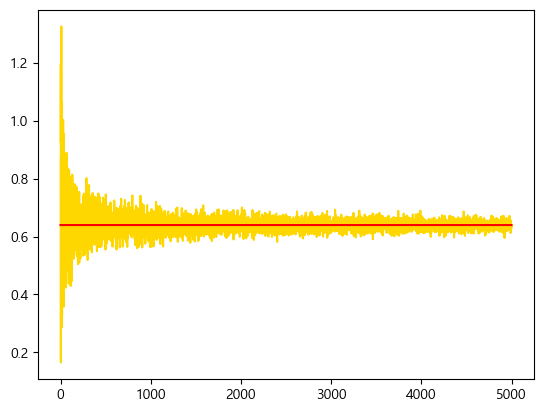

In [210]:
m_var = 0.64
s_var = np.zeros(5000)

for i in range(5000):
    sample=np.random.normal(10,0.8, i)
    s_var[i] = np.var(sample, ddof=1)
    
sns.lineplot(s_var, color='gold')           # 샘플 사이즈에 따른 불편분산
sns.lineplot([m_var]*len(s_var), color='red')    # 모분산

Q23. 평균 4, 표준편차 0.8이 정규분포에서 확률이 0.5일때의 분위수 값을 계산하세요.

In [211]:
stats.norm.ppf(0.5, loc=4, scale=0.8)

4.0

Q24. 모집단의 평균과 표준편차가 각각 100, 10으로 알려져 있다. 표본의 크기가 100이고 표본평균과 모평균간 차이가 있는지 유의성 검정을 수행하세요

In [309]:
m_mean = 100
m_std = 10

n = 100
sample = np.random.normal(m_mean, m_std, n)
mean = np.mean(sample)
std = np.std(sample, ddof=1)

z = (mean-m_mean) / (m_std/np.sqrt(n))
p = 1-stats.norm.cdf(z)   #z-score를 쓸 땐 자유도 필요없음
print(f"검정통계량: {z}")  #검정통계량이 임계값 내에 있으므로 귀무가설 채택
print(f"유의확률: {p}")    #유의확률이 유의수준보다 높으므로 귀무가설 채택

cv = stats.norm.ppf(0.05/2)
print(f'임계값: {cv} ~ {-cv}')

#결론: 귀무가설 채택 -> 표본 평균과 모평균 간 차이가 없음

검정통계량: 0.0778479582763083
유의확률: 0.4689744984924845
임계값: -1.9599639845400545 ~ 1.9599639845400545


Q25. 모집단의 표준편차를 알지 못하는 상황하에서 표본의 크기가 20인 다음의 경우에 표본평균과 모평균간 차이가 있는지 유의성 검정을 수행하세요


In [223]:
# 모집단의 평균을 지정합니다.
mu = 100

# 표본 데이터를 생성합니다.
sample_size = 20
sample = np.random.normal(mu, 10, sample_size)
mean = np.mean(sample)
std = np.std(sample)

t = (mean - mu) / (std / np.sqrt(sample_size))    # 검정통계량
p = stats.t.sf(abs(t), sample_size-1)*2        # p-value
crit = stats.t.ppf(0.025, sample_size-1)       # 임계값

print(f"검정통계량: {t}")
print(f"유의확률: {p}")
print(f"임계값: {crit} ~ {-crit}")

# t값이 임계갑 내에 있고, 유의확률이 유의수준보다 높으므로 귀무가설 채택
# 표본평균과 모평균간 유의미한 차이 없음

검정통계량: -1.7074762846797997
유의확률: 0.10402267034828261
임계값: -2.0930240544082634 ~ 2.0930240544082634


Q26. 아래 주어진 데이터셋에서 약을 복용하기 전과 복용 후의 체온에 변화가 있는지에 대한 유의성 검정을 수행하세요.

In [253]:
# 대응표본 t-검정
pt_data = pd.read_csv('../dataset/5_9_ptt.csv')
pt_data

a = np.array(pt_data.body_temperature[pt_data['medicine']=='after'])
b = np.array(pt_data.body_temperature[pt_data['medicine']=='before'])
diff = a-b

t,p = stats.ttest_1samp(diff,0)   # 일표본검정/ 평균값이 0인지 아닌지
t,p = stats.ttest_rel(b, a)    #같은 결과

print(f"t-score: {t}")
print(f"p-value: {p}")
# p값이 0.05이하이므로, 귀무가설 기각 -> 대립가설이 통계적으로 유의미한 값을 가짐

t-score: -2.901693483620596
p-value: 0.044043109730074276


Q27.남자와 여자 두 그룹에 대해서 평균 키의 차이가 있는지에 대한 유의성 검정을 수행하세요.
- 남자의 키 데이터 : [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
- 여자의 키 데이터 : [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

In [260]:
# 독립표본 t-검정
man = [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
woman = [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

t,p = stats.ttest_ind(man, woman)
print(f"t-score: {t}")
print(f"p-value: {p:.6f}")
# p값이 0.05이하이므로, 귀무가설 기각 -> 대립가설이 통계적으로 유의미한 값을 가짐

t-score: 5.90839156700797
p-value: 0.000014


Q28. 아래 데이터셋에서 color별 click빈도가 다른지에 대한 독립성 검정을 수행하세요.

In [310]:
click_data = pd.read_csv('../dataset/5_10_cd.csv')

table = pd.pivot_table(data=click_data, values='freq', aggfunc='sum', index='color',columns='click')
a,b,c,d = chi2_contingency(table)

print(f"카이제곱 검정통계량: {a}")
print(f"유의확률(p-value): {b}")
print(f"자유도: {c}")
print(f"기대빈도: {d}")
table

카이제곱 검정통계량: 5.4
유의확률(p-value): 0.02013675155034633
자유도: 1
기대빈도: [[ 25. 225.]
 [  5.  45.]]


click,click,not
color,,
blue,20,230
red,10,40


Q29."아래 표본의 평균은 10과 같다"라는 귀무가설에 대하여 "표본 평균은 10이 아니다"라는 대립가설이 유의미한지 검정을 수행하세요.

sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

In [276]:
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])
m_mean = 10

t,p = stats.ttest_1samp(sample_data, m_mean)   #(검정하려는 표본데이터, 귀무가설에서 주어진 모집단 평균)
print(f"t-score: {t}")
print(f"p-value: {p}")
# p값이 0.05보다 작으므로, 귀무가설 기각 -> 대립가설이 통계적으로 유의미한 값을 가짐

t-score: 3.3141516532462774
p-value: 0.009024007157468749


Q30. 아래 df 데이터셋에서 "무게의 평균이 130g보다 작지 않다."라는 귀무가설에 대한 유의성 검정을 수행하세요.(정규분포, 모분산 9) 

In [337]:
# 작지않다 -> 단측검정
df = pd.read_csv('../data/ch11_potato.csv')

m_mean=130
m_var = 9

alpha=0.05
s_mean = np.mean(df['무게'])
n=len(df)

z = (s_mean - m_mean) / (np.sqrt(m_var/n))
print(f"z-score: {z}") 
rv = stats.norm.isf(1-alpha)
print(f"임계치: {rv}")

p = stats.norm.sf(z)
print(f"p-value: {p}")
print(f"유의수준: 0.05")
# z값이 임계치를 벗어났으므로 귀무가설 기각x
# 유의확률이 유의수준보다 크므로 귀무가설 기각x

z-score: -1.932298779026813
임계치: -1.6448536269514722
p-value: 0.9733386804768733
유의수준: 0.05
